In [76]:
def fit(tmin, tmax, y0):
    print('Start: ', xdata[tmin])
    print('End: ', xdata[tmax])
    
    t = np.arange(tmin, tmax)
    popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
    R_0_list.append(R_0(popt[0], popt[2]))
    print('Rt = ', R_0(popt[0], popt[2]))
    s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])
    i_list.append(i)
    
    # plt.figure(figsize=(16, 10))
    # plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
    # plt.plot(t, i, 'r', label = 'Infected fitted')
    # plt.legend()
    # plt.xticks(fontsize=10) 
    # plt.yticks(fontsize=10) 
    # plt.grid()
    # plt.show()
    return s, e, i, r

In [77]:
df_covid = pd.read_csv('data/dpc-covid19-ita-regioni.csv', parse_dates = ['data'])
df_covid = df_covid[df_covid['denominazione_regione'] == 'Lombardia']
df_covid = df_covid[df_covid['data'] < '2020-12-29']
df_covid['data'] = pd.to_datetime(df_covid['data']).dt.date
df_covid = df_covid.drop(columns = ['casi_da_sospetto_diagnostico', 'casi_da_screening', 'tamponi', 'casi_testati', 'note', 'ingressi_terapia_intensiva', 
                                   'note_test', 'note_casi', 'totale_positivi_test_molecolare', 'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
                                   'tamponi_test_antigenico_rapido', 'ricoverati_con_sintomi', 'terapia_intensiva', 'stato', 'isolamento_domiciliare',
                                   'totale_ospedalizzati', 'codice_regione', 'denominazione_regione', 'lat', 'long', 'codice_nuts_1' , 'codice_nuts_2'])

df_covid['recovered_death'] = df_covid['dimessi_guariti'] + df_covid['deceduti']
df_covid = df_covid.reset_index()
df_covid.head(10)

,index,data,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,recovered_death
0,8,2020-02-24,166,0,166,0,6,172,6
1,29,2020-02-25,231,65,68,0,9,240,9
2,50,2020-02-26,249,18,18,0,9,258,9
3,71,2020-02-27,349,100,145,40,14,403,54
4,92,2020-02-28,474,125,128,40,17,531,57
5,113,2020-02-29,552,78,84,40,23,615,63
6,134,2020-03-01,887,335,369,73,24,984,97
7,155,2020-03-02,1077,190,270,139,38,1254,177
8,176,2020-03-03,1326,249,266,139,55,1520,194
9,197,2020-03-04,1497,171,300,250,73,1820,323


In [84]:
xdata = df_covid['data']
I = normalized(df_covid['totale_positivi'])
R = normalized(df_covid['recovered_death'])
N = 10000000

In [85]:
t_list = [[0,21], [21, 87], [87, 118], [118, 179], [179, 225], [225, 258], [258, 290],
         [290, 300]]
R_0_list = []
i_list = []
s, e, i, r = np.array([0]), np.array([0]), np.array([0]), np.array([0])

In [86]:
for t in t_list:
    tmin, tmax =t[0], t[1] 
    E0, I0, R0 = e[-1], I[tmin], R[tmin]
    S0 = N - E0 - I0 - R0
    y0 = S0, E0, I0, R0
    s, e, i, r = fit(tmin,tmax, y0)

Start:  2020-02-24
End:  2020-03-16
Rt =  4287238870496.8525
Start:  2020-03-16
End:  2020-05-21
Rt =  1.0928702799011798
Start:  2020-05-21
End:  2020-06-21
Rt =  0.9270779096510975
Start:  2020-06-21
End:  2020-08-21
Rt =  0.6657848805132337
Start:  2020-08-21
End:  2020-10-06
Rt =  1.0460129562823721
Start:  2020-10-06
End:  2020-11-08
Rt =  1.3612644968214997
Start:  2020-11-08
End:  2020-12-10
Rt =  1.1373465688036895
Start:  2020-12-10
End:  2020-12-20
Rt =  0.8844468508808265


In [87]:
# tmin, tmax = 0,21 
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 21, 87 
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 87, 118
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 118, 179
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 179, 225
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 225, 242 
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 242, 258
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 258, 290
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# tmin, tmax = 290, 300
# E0, I0, R0 = e[-1], I[tmin], R[tmax]
# S0 = N - E0 - I0 - R0
# y0 = S0, E0, I0, R0
# s, e, i, r = fit(tmin,tmax, y0)

# Fit results

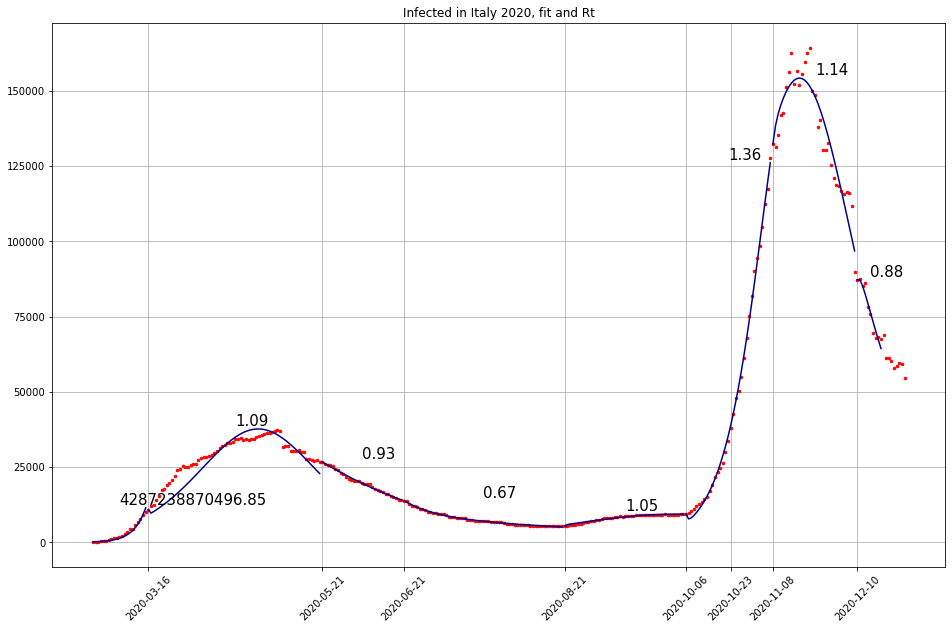

In [88]:
plt.figure(figsize=(16, 10))

plt.plot(xdata, I, 'r.', markersize=5)
def plot_bello(lista):
    for i in range(len(lista)):
        idx_0 = lista[i][0]
        idx_1 = lista[i][1]
        plt.text(xdata[int((idx_1 + idx_0)/2)], np.max(i_list[i]) + 1000, str(round(R_0_list[i],2)), fontsize = 15)
        plt.plot(xdata[idx_0:idx_1], i_list[i], 'darkblue', label = 'SIR model')
plot_bello(t_list)
plt.title('Infected in Italy 2020, fit and Rt')
plt.xticks([xdata[21], xdata[87],xdata[118],xdata[179],xdata[225],xdata[242],xdata[258],xdata[290]], rotation = 45,
    fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

# Fit procedure

### First phase

In [33]:
tmin = 0
tmax = 21
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = 0
I0 = I[0]
E0 = 0
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
print(y0)
t = np.arange(tmin, tmax)

Start:  2020-02-24
End:  2020-03-16
(9999834, 0, 166, 0)


In [34]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]),bounds = (0, [3., 3., 1.]))
popt

array([2.30387783e-01, 3.00000000e+00, 3.70030109e-12])

In [35]:
R_0(popt[0], popt[2])

62261901660.10571

In [36]:
#I0, R0 = int(popt[0]), 0
#S0 = N - I0 - R0
y0 = S0, E0, I0, R0
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

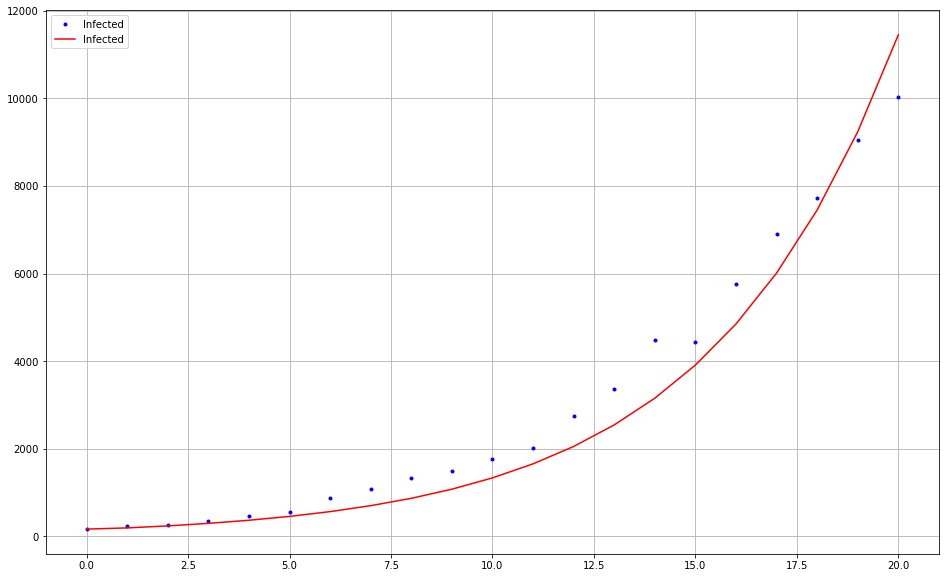

In [37]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t, SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### First lockdown 12-03 until 21-06

In [38]:
tmin = 21
tmax = 87
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)
print(y0)

Start:  2020-03-16
End:  2020-05-21
(9984532, 819, 10861, 3788)


In [39]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([0.85884522, 3.        , 0.78586076])

In [40]:
R_0(popt[0], popt[2])

1.0928719930719248

In [807]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

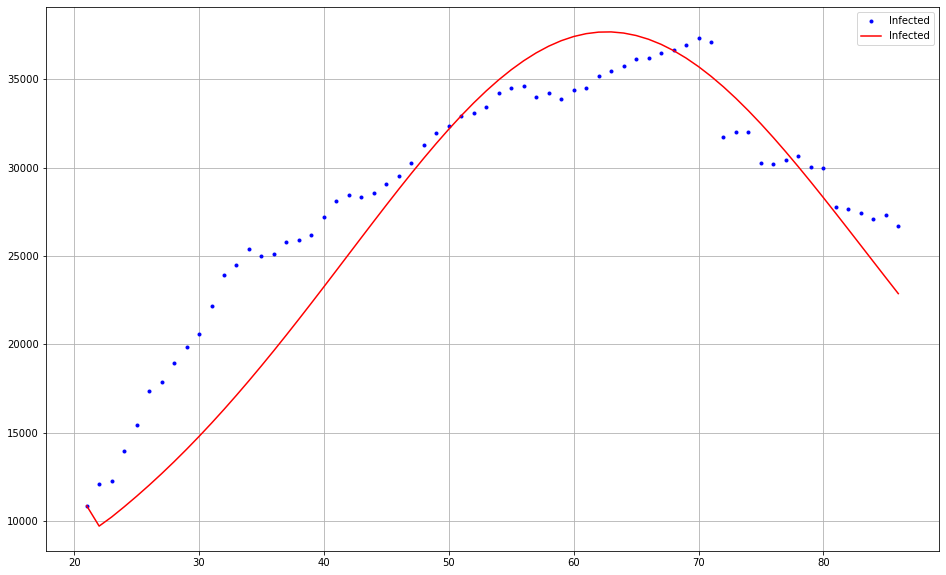

In [903]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 21-06 until 13-07

In [809]:
tmin = 87
tmax = 118
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

Start:  2020-05-21
End:  2020-06-21


In [810]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([0.26810462, 1.26416665, 0.28919298])

In [811]:
R_0(popt[0], popt[2])

0.9270785848577379

In [812]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

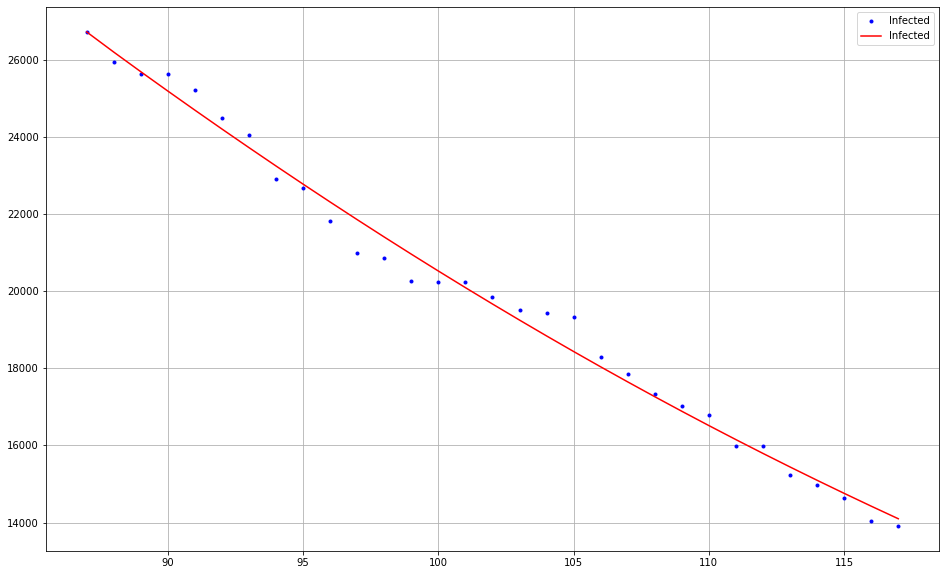

In [813]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 13-07 until

In [814]:
tmin = 118
tmax = 179
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

Start:  2020-06-21
End:  2020-08-21


In [815]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([0.0314747 , 0.04568774, 0.04727458])

In [816]:
R_0(popt[0], popt[2])

0.6657848879415417

In [817]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

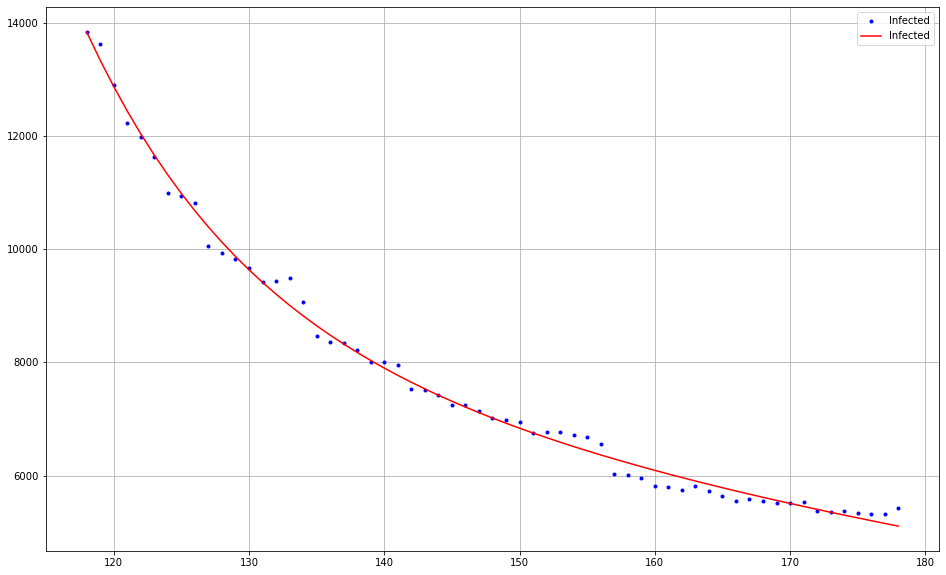

In [818]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 13-07 until

In [819]:
tmin = 179
tmax = 225
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

Start:  2020-08-21
End:  2020-10-06


In [820]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([1.04600786, 1.51143703, 0.9999977 ])

In [821]:
R_0(popt[0], popt[2])

1.0460102638112627

In [822]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

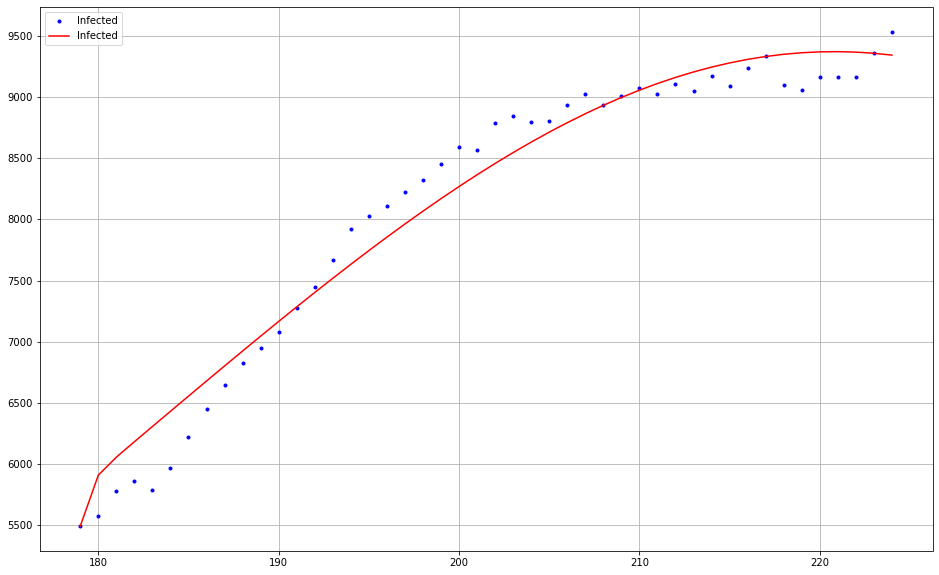

In [823]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 13-07 until

In [824]:
tmin = 225
tmax = 242
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

Start:  2020-10-06
End:  2020-10-23


In [825]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([2.93905501e-01, 4.87105550e-02, 2.12926540e-17])

In [826]:
R_0(popt[0], popt[2])

1.3803140819224204e+16

In [827]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

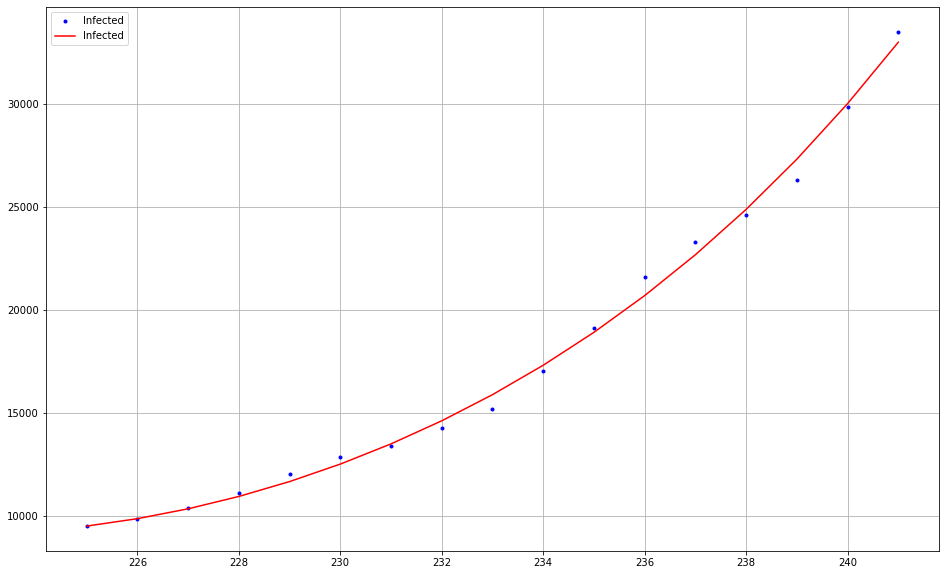

In [828]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 13-07 until

In [829]:
tmin = 242
tmax = 258
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

Start:  2020-10-23
End:  2020-11-08


In [830]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([1.25032569, 0.63234378, 0.95235569])

In [831]:
R_0(popt[0], popt[2])

1.3128767993233337

In [832]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

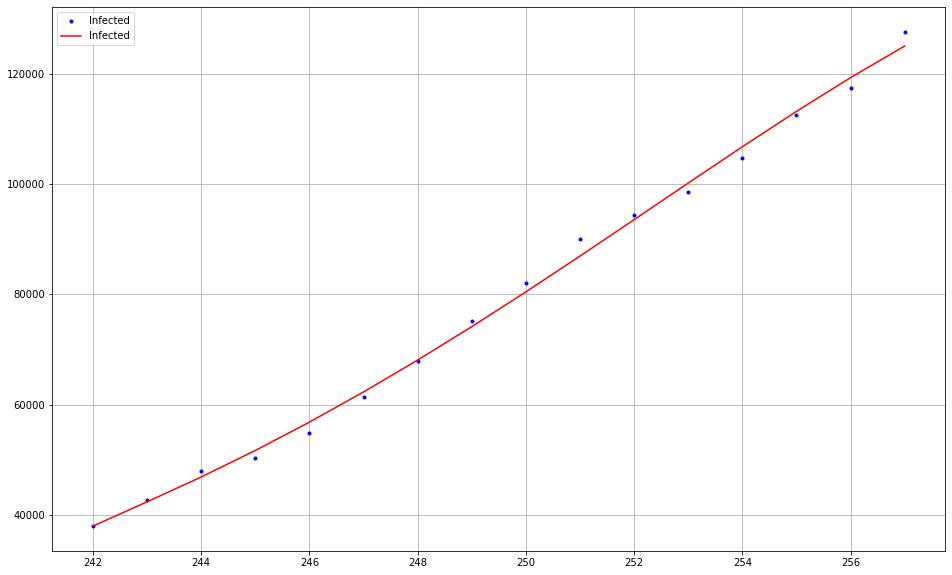

In [833]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 13-07 until

In [834]:
tmin = 258
tmax = 290
print('Start: ', xdata[tmin])
print('End: ', xdata[tmax])
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

Start:  2020-11-08
End:  2020-12-10


In [835]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([0.63813411, 0.41633413, 0.55929656])

In [836]:
R_0(popt[0], popt[2])

1.1409584025275152

In [837]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

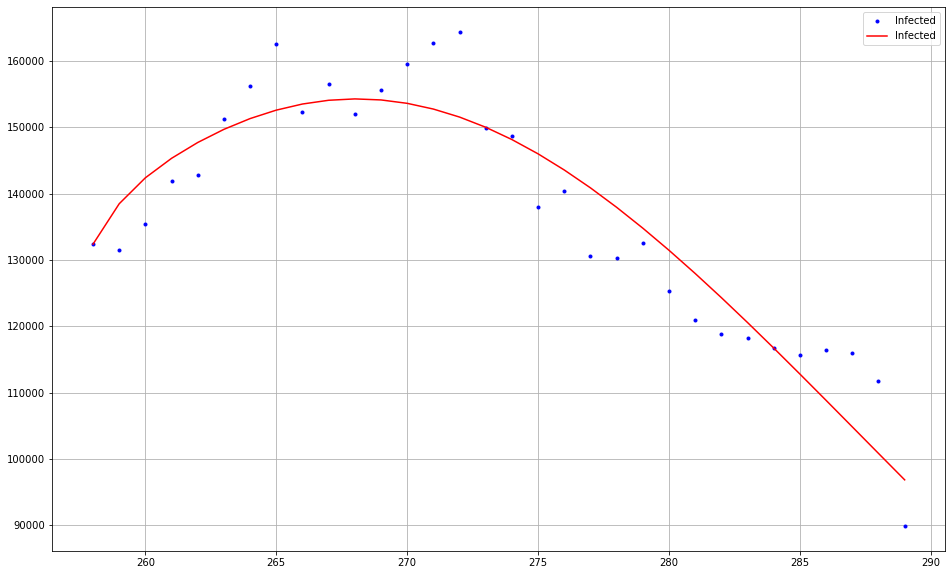

In [838]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()

### Post lockdown 13-07 until

In [794]:
tmin = 290
tmax = 300
R0 = int(R[tmin])
I0 = I[tmin]
E0 = int(e[-1])
S0 = N - E0 - I0 - R0
y0 = S0, E0, I0, R0
t = np.arange(tmin, tmax)

In [795]:
popt, _ = curve_fit(SEIR_dopo, t, np.array(I[tmin:tmax]), bounds = (0, [3., 3., 1.]))
popt

array([0.45684414, 0.38862525, 0.51762376])

In [796]:
R_0(popt[0], popt[2])

0.8825795440340287

In [516]:
s, e, i, r = SEIR_predict(y0, t, popt[0], popt[1], popt[2])

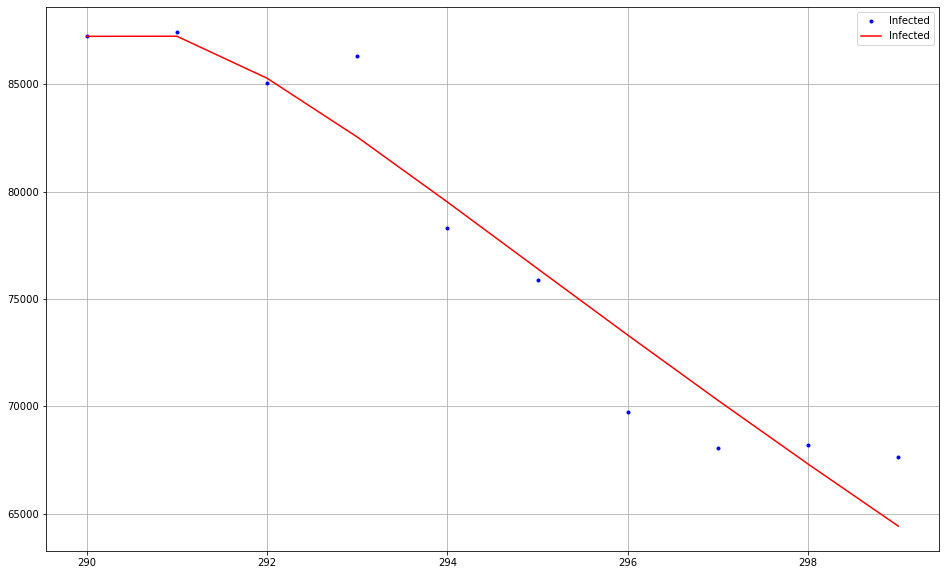

In [797]:
plt.figure(figsize=(16, 10))
plt.plot(t, I[tmin:tmax], 'b.', label = 'Infected')
plt.plot(t,  SEIR_predict(y0, t, popt[0], popt[1], popt[2])[2], 'r', label = 'Infected')
plt.legend()
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()